<a href="https://www.kaggle.com/code/eavprog/abscur-pairs-ret-avg?scriptVersionId=219351020" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Средние доходности для парных валютных курсов**

См. страницу на сайте [https://www.abscur.ru/p/blog-page_66.html](https://www.abscur.ru/p/blog-page_66.html)


# Диапазоны

In [1]:
import pandas as pd

# Получение сегодняшней даты и вычисление дат в прошлом
today = pd.Timestamp.now().normalize()

days_ago_7 = today - pd.Timedelta(days=7)
month_ago = today - pd.DateOffset(months=1)
quarter_ago = today - pd.DateOffset(months=3)
half_year_ago = today - pd.DateOffset(months=6)
year_ago = today - pd.DateOffset(years=1)
two_years_ago = today - pd.DateOffset(years=2)
three_years_ago = today - pd.DateOffset(years=3)
five_years_ago = today - pd.DateOffset(years=5)
ten_years_ago = today - pd.DateOffset(years=10)

# Создание списка диапазонов и их расшифровок
date_ranges = [
    [month_ago, today, "месяц","1m"],
    [quarter_ago, today, "квартал","1q"],
    [half_year_ago, today, "полгода","y2"],
    [year_ago, today, "год","1y"],
    [two_years_ago, today, "два года","2y"],
    [three_years_ago, today, "три года","3y"],
    [five_years_ago, today, "пять лет","5y"],
    [ten_years_ago, today, "десять лет","10y"]
]

ago_dates = {item[2] : item[0] for item in date_ranges}
period_suffix = {item[2] : item[3] for item in date_ranges}

# Загрузка парных курсов

In [2]:
all_pairs = pd.read_csv('/kaggle/input/abscur2/pairs_close.csv',index_col='Date')
all_pairs.index = pd.to_datetime(all_pairs.index)
all_pairs

,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-25,6.1381,92.46000,6.5820,0.78759,94.918,6.6635,1.39890,8.5918,131.22501,1.41341,...,68.7020,3.7580,8.36040,1.34401,32.54,2.3550,31.290,15.8100,21320.0,11.4501
2015-01-26,6.1381,93.87030,6.5820,0.79221,94.918,6.6635,1.39890,8.5918,131.22501,1.41980,...,68.7020,3.7580,8.29077,1.34401,32.54,2.3550,31.290,15.8100,21320.0,11.4501
2015-01-27,6.1434,93.26150,6.4844,0.79214,95.002,6.5965,1.39650,8.5869,130.42999,1.43480,...,67.7000,3.7595,8.18620,1.33837,32.50,2.3631,31.070,15.8995,21320.0,11.5677
2015-01-28,6.1105,92.78060,6.5450,0.78927,93.743,6.6244,1.39990,8.5583,129.72301,1.42960,...,67.8242,3.7585,8.29740,1.35294,32.55,2.3880,31.180,15.8692,21320.0,11.5731
2015-01-29,6.0205,92.01400,6.4182,0.77821,93.733,6.5469,1.39380,8.4014,128.19000,1.45620,...,69.1050,3.7575,8.26040,1.35263,32.76,2.4139,31.560,15.8692,21275.0,11.5467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-22,4.8839,98.12600,6.8984,0.62750,108.824,7.6506,1.75265,8.5900,172.63200,1.65913,...,99.2010,3.7479,11.00367,1.35519,33.86,35.6390,32.698,42.1661,25050.0,18.4638
2025-01-23,4.8935,98.10203,6.9173,0.62833,108.481,7.6456,1.75315,8.5842,171.98600,1.65769,...,99.9760,3.7503,10.99773,1.35503,33.95,35.6427,32.709,42.0325,25080.0,18.5127
2025-01-24,4.9129,98.45400,6.8936,0.63146,108.697,7.6001,1.74540,8.5981,172.15000,1.66184,...,97.7750,3.7469,10.92390,1.34580,33.53,35.6517,32.730,41.9751,25060.0,18.3785


# Таблица средних доходностей парных валютных курсов

In [3]:
import pandas as pd

# Создаем пустой DataFrame для хранения результатов
mean_returns = pd.DataFrame()

# Вычисляем средние доходности для каждой валютной пары в заданных диапазонах
for range_name, start_date in ago_dates.items():
    # Определяем конец диапазона как следующий день после последней даты в all_pairs
    end_date = all_pairs.index.max() + pd.Timedelta(days=1)
    
    # Фильтруем данные по диапазону
    filtered_data = all_pairs.loc[start_date:end_date]
    
    # Вычисляем доходности (относительные изменения)
    returns = filtered_data.pct_change() * 100  # Умножаем на 100 для получения в процентах
    
    # Вычисляем средние значения доходностей
    mean_returns[range_name] = returns.mean()

# Настройки отображения для вывода всех строк и столбцов
pd.set_option('display.max_rows', None)  # Выводить все строки
pd.set_option('display.max_columns', None)  # Выводить все столбцы

# Форматируем вывод до 4 знаков после запятой
mean_returns = mean_returns.round(4)

# Выводим результат
mean_returns

,месяц,квартал,полгода,год,два года,три года,пять лет,десять лет
AUDHKD,0.0628,-0.0531,-0.0237,-0.0130,-0.0186,-0.0108,-0.0029,-0.0054
AUDJPY,0.0119,-0.0304,-0.0107,0.0059,0.0120,0.0220,0.0203,0.0037
AUDSEK,0.0152,-0.0205,-0.0162,0.0016,-0.0083,0.0056,0.0046,0.0028
AUDUSD,0.0543,-0.0554,-0.0212,-0.0122,-0.0176,-0.0109,-0.0028,-0.0056
CADJPY,-0.0316,-0.0089,-0.0118,-0.0025,0.0185,0.0214,0.0190,0.0062
CADSEK,-0.0285,-0.0060,-0.0168,-0.0059,-0.0012,0.0051,0.0040,0.0055
CHFAUD,-0.0866,0.0004,0.0078,-0.0012,0.0225,0.0160,0.0108,0.0086
CHFHKD,-0.0186,-0.0517,-0.0163,-0.0153,0.0026,0.0032,0.0056,0.0010
CHFJPY,-0.0769,-0.0244,-0.0057,0.0023,0.0325,0.0363,0.0283,0.0098
EURAUD,-0.0280,0.0214,0.0018,0.0033,0.0138,0.0065,0.0028,0.0063


# Рейтинги средних доходностей парных валютных курсов

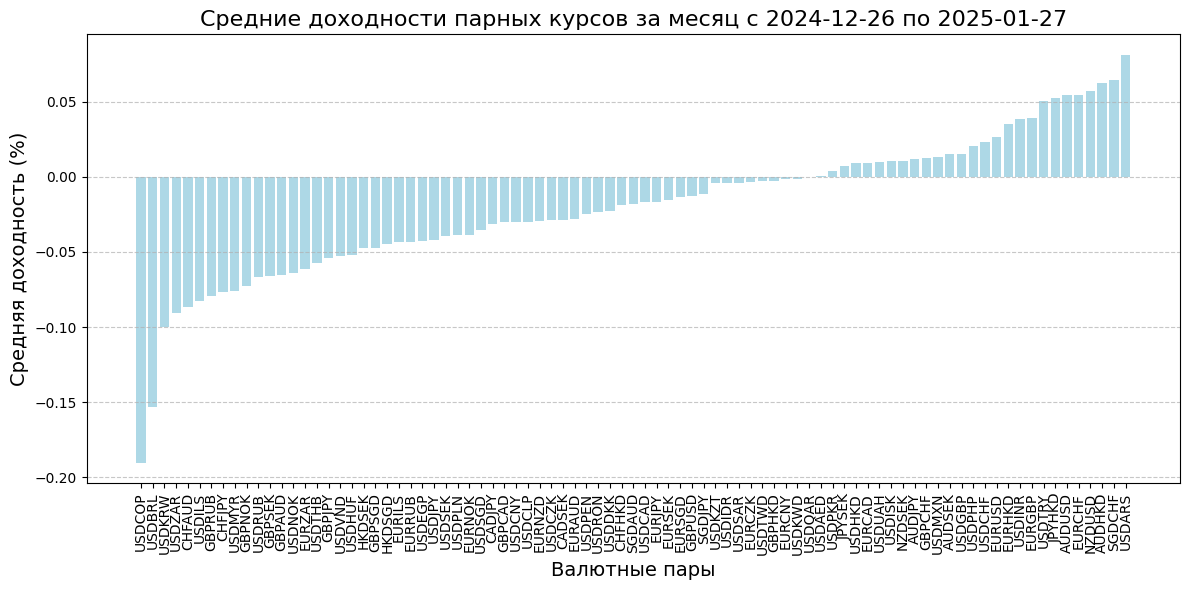

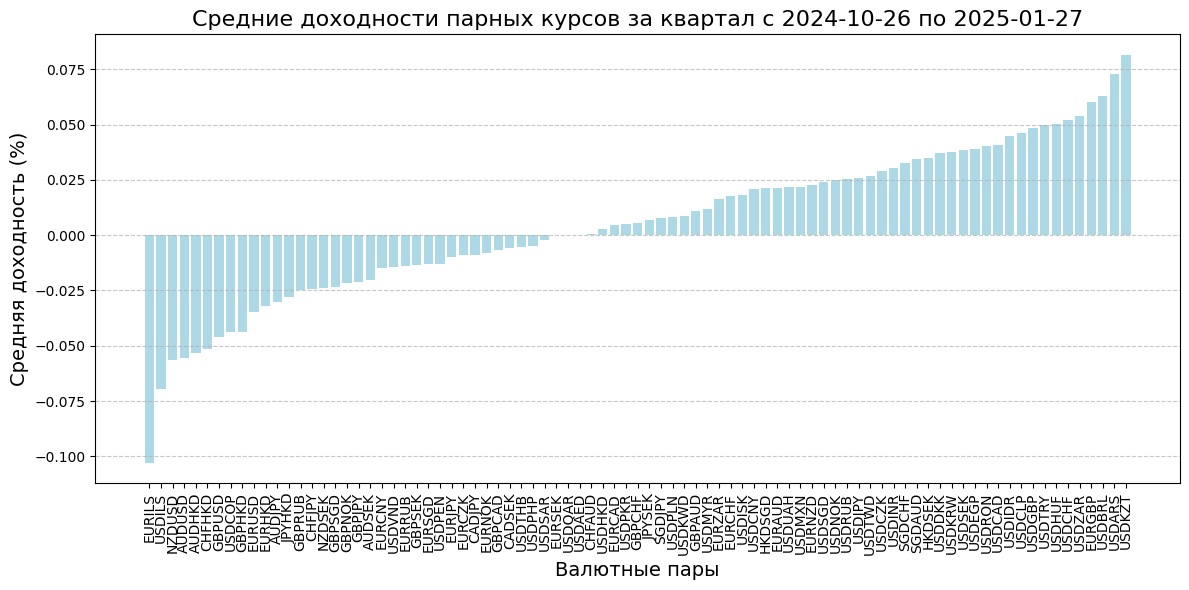

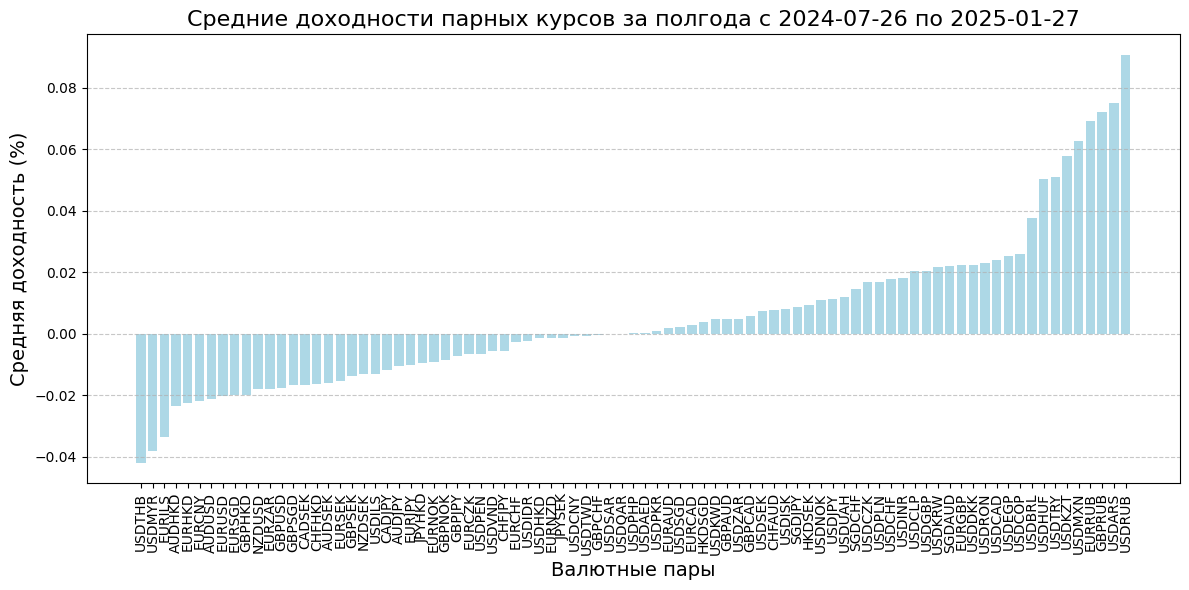

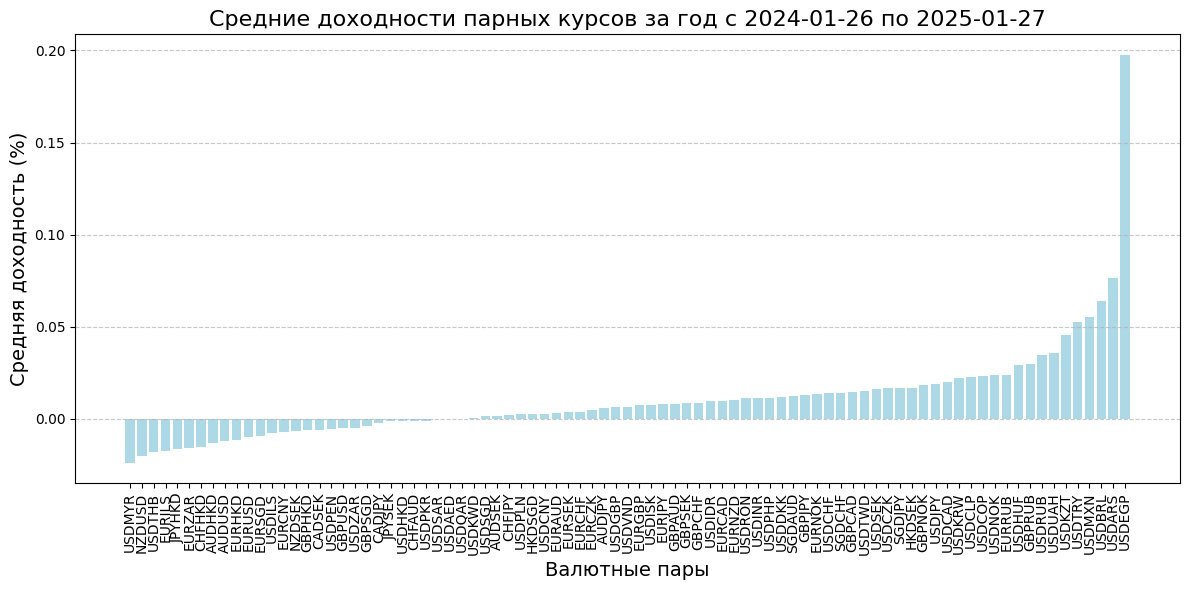

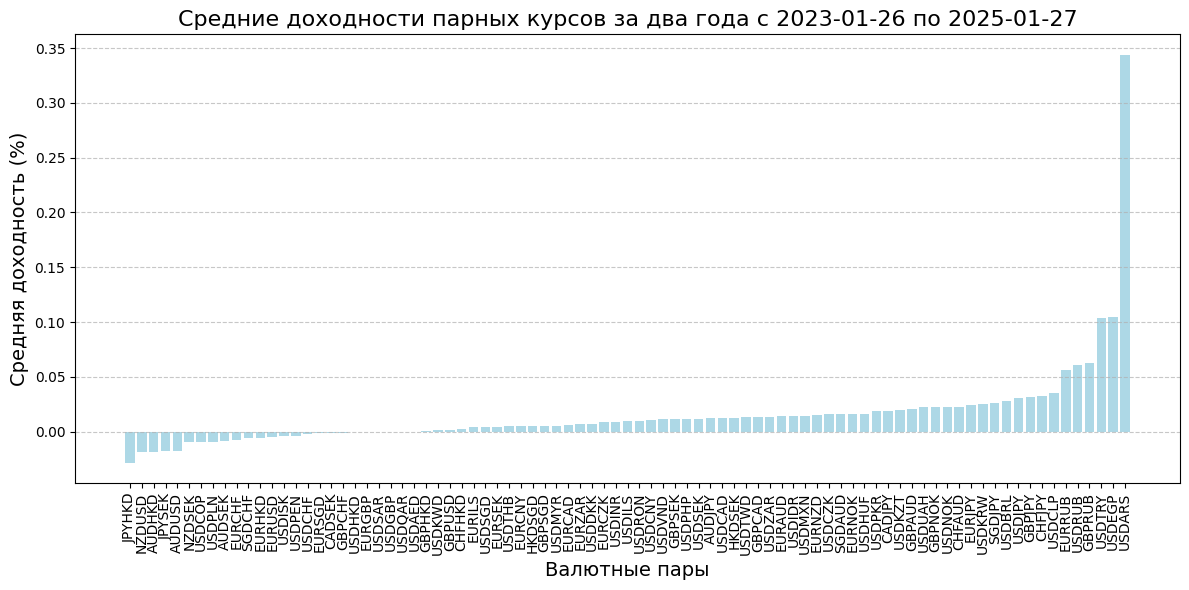

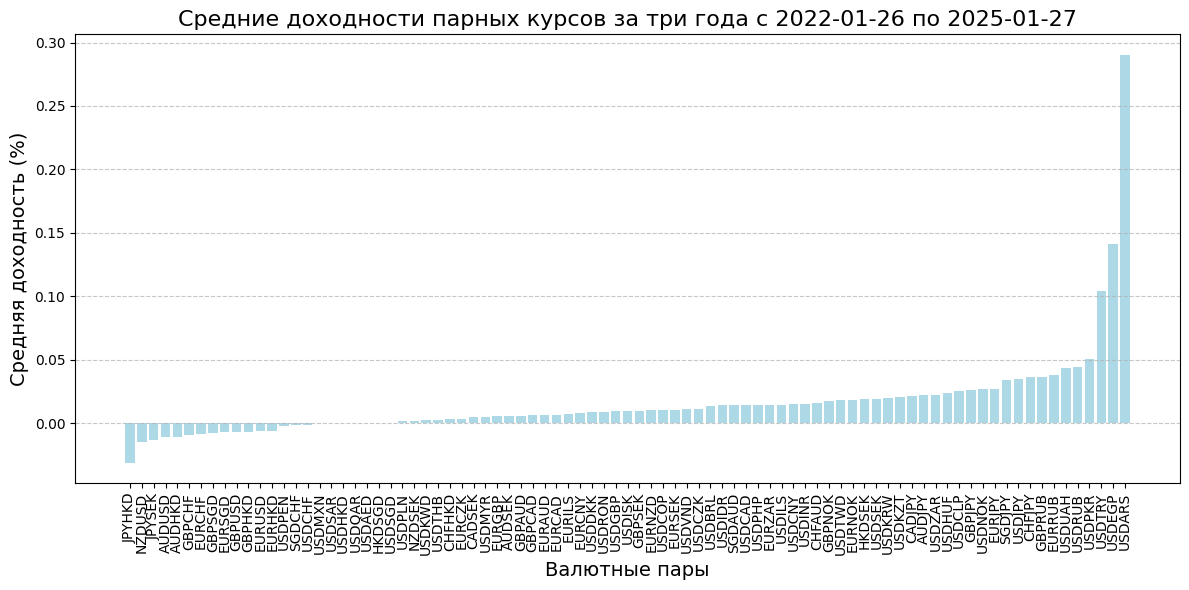

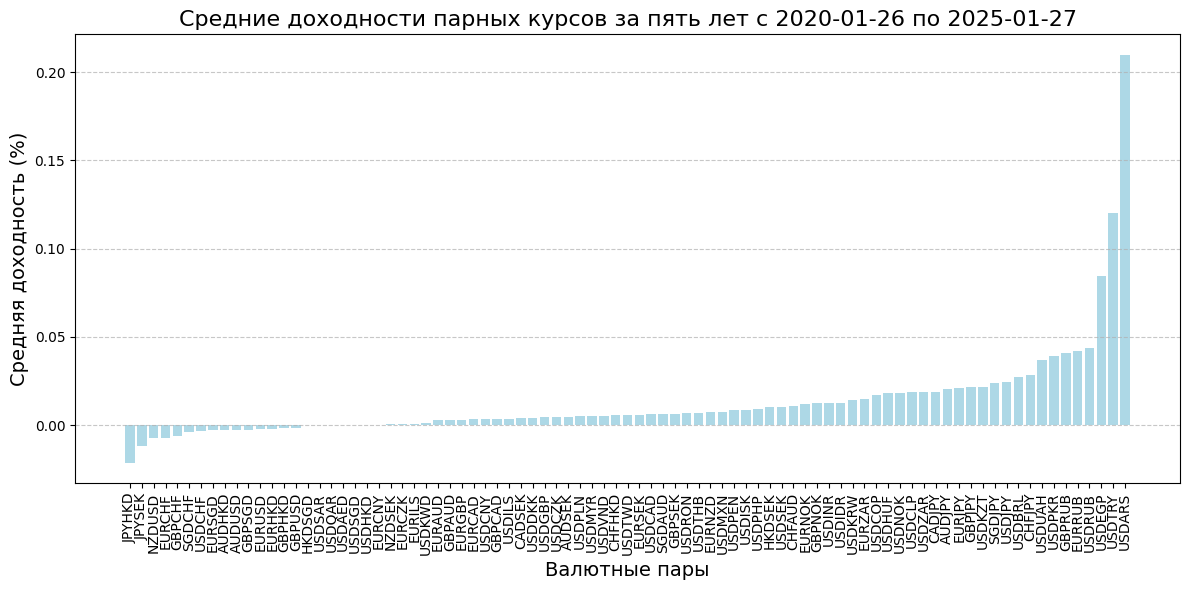

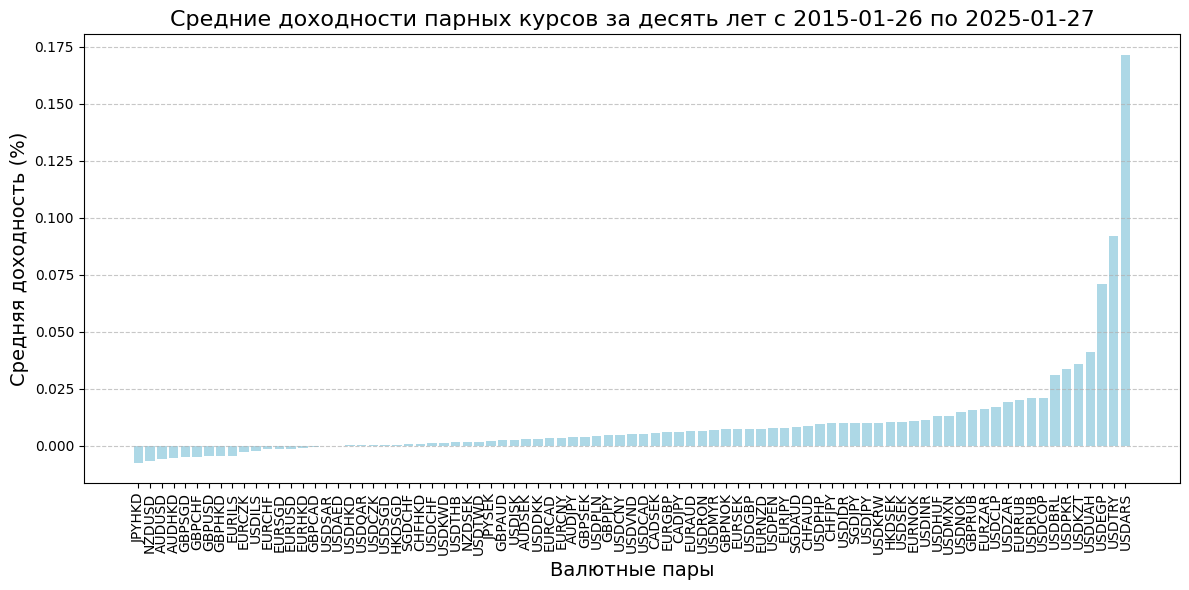

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Генерация столбчатых диаграмм для каждого диапазона средних доходностей
for range_name in mean_returns.columns:  # Цикл по колонкам (диапазонам)
    plt.figure(figsize=(12, 6))
    
    # Сортируем значения по возрастанию
    sorted_values = mean_returns[range_name].sort_values()
    
    # Создаем столбчатую диаграмму
    plt.bar(sorted_values.index, sorted_values.values, color='lightblue')
    
    # Определяем границы диапазона
    start_date = ago_dates[range_name]
    end_date = all_pairs.index.max() + pd.Timedelta(days=1)  # Конец диапазона
    
    # Настройки графика с границами диапазонов в заголовке
    plt.title(f'Средние доходности парных курсов за {range_name} с {start_date.date()} по {end_date.date()}', fontsize=16)
    plt.xlabel('Валютные пары', fontsize=14)
    plt.ylabel('Средняя доходность (%)', fontsize=14)
    
    # Поворот меток на оси X на 90 градусов
    plt.xticks(rotation=90)
    
    # Добавляем сетку для удобства чтения графика
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Отображаем график
    plt.tight_layout()
    plt.show()


# Генерация MD кода

In [5]:
import pandas as pd

# Генерация MD-кода для таблицы std_devs
md_table = mean_returns.to_markdown(index=True)

print(md_table)

|        |   месяц |   квартал |   полгода |     год |   два года |   три года |   пять лет |   десять лет |
|:-------|--------:|----------:|----------:|--------:|-----------:|-----------:|-----------:|-------------:|
| AUDHKD |  0.0628 |   -0.0531 |   -0.0237 | -0.013  |    -0.0186 |    -0.0108 |    -0.0029 |      -0.0054 |
| AUDJPY |  0.0119 |   -0.0304 |   -0.0107 |  0.0059 |     0.012  |     0.022  |     0.0203 |       0.0037 |
| AUDSEK |  0.0152 |   -0.0205 |   -0.0162 |  0.0016 |    -0.0083 |     0.0056 |     0.0046 |       0.0028 |
| AUDUSD |  0.0543 |   -0.0554 |   -0.0212 | -0.0122 |    -0.0176 |    -0.0109 |    -0.0028 |      -0.0056 |
| CADJPY | -0.0316 |   -0.0089 |   -0.0118 | -0.0025 |     0.0185 |     0.0214 |     0.019  |       0.0062 |
| CADSEK | -0.0285 |   -0.006  |   -0.0168 | -0.0059 |    -0.0012 |     0.0051 |     0.004  |       0.0055 |
| CHFAUD | -0.0866 |    0.0004 |    0.0078 | -0.0012 |     0.0225 |     0.016  |     0.0108 |       0.0086 |
| CHFHKD | -0.0186 

# Генерация HTML-кода

In [6]:
import pandas as pd

# Генерация HTML-кода для таблицы std_devs
html_table = mean_returns.to_html(index=True, border=1, justify='right', escape=False)

# Добавление CSS для выравнивания и предотвращения переноса значений в ячейках
html_table = html_table.replace('<table', '<table style="table-layout: fixed; word-wrap: nowrap;"')

html_table = html_table.replace('\n', '')

# Выводим HTML-код
print(html_table)

<table style="table-layout: fixed; word-wrap: nowrap;" border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>месяц</th>      <th>квартал</th>      <th>полгода</th>      <th>год</th>      <th>два года</th>      <th>три года</th>      <th>пять лет</th>      <th>десять лет</th>    </tr>  </thead>  <tbody>    <tr>      <th>AUDHKD</th>      <td>0.0628</td>      <td>-0.0531</td>      <td>-0.0237</td>      <td>-0.0130</td>      <td>-0.0186</td>      <td>-0.0108</td>      <td>-0.0029</td>      <td>-0.0054</td>    </tr>    <tr>      <th>AUDJPY</th>      <td>0.0119</td>      <td>-0.0304</td>      <td>-0.0107</td>      <td>0.0059</td>      <td>0.0120</td>      <td>0.0220</td>      <td>0.0203</td>      <td>0.0037</td>    </tr>    <tr>      <th>AUDSEK</th>      <td>0.0152</td>      <td>-0.0205</td>      <td>-0.0162</td>      <td>0.0016</td>      <td>-0.0083</td>      <td>0.0056</td>      <td>0.0046</td>      <td>0.0028</td>    </tr>    <tr>      <th>AUDUS